<h2><font color="#004D7F" size=5>Módulo 2: Bootstrap Aggregation</font></h2>



<h1><font color="#004D7F" size=6> 3. Random Subspace Ensemble </font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Algoritmo de conjunto Random Subspace](#section1)
* [2. Random Subspace según el tipo de problema](#section2)
    * [2.1. Random Subspace para Clasificación](#section21)
    * [2.2. Random Subspace para Regresión](#section22)
* [3. Hiperparámetros de Random Subspace](#section3)
   * [3.1. Número de árboles](#section31)
   * [3.2. Número de características](#section32)
   * [3.3. Algoritmo alternativo](#section33)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

Random Subspace Ensemble es un algoritmo de aprendizaje automático que combina las predicciones de múltiples árboles de decisión entrenados en diferentes subconjuntos de columnas en el conjunto de datos de entrenamiento. Variar aleatoriamente las columnas utilizadas para entrenar a cada miembro contribuyente del conjunto tiene el efecto de introducir diversidad en el conjunto y, a su vez, puede mejorar el rendimiento respecto al uso de un único árbol de decisión. Por tanto, estudiaremos en este tutorial:
- Random Subspace se crean a partir de árboles de decisión que se ajustan a diferentes muestras de características (columnas) en el conjunto de datos de entrenamiento.
- Cómo utilizar Random Subspace para clasificación y regresión con Scikit-learn.
- Cómo explorar el efecto de los hiperparámetros de Random Subspace en el rendimiento del modelo.

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Algoritmo de conjunto Random Subspace</font>

Un problema de modelado predictivo consta de una o más variables de entrada y una variable objetivo. Podemos considerar que todas las características de entrada juntas definen un espacio vectorial de _n_ dimensiones, donde _n_ es el número de características de entrada y cada ejemplo (fila de datos de entrada) es un punto en el espacio de características. 

Esta es una conceptualización común en el aprendizaje automático y, a medida que los espacios de características de entrada se hacen más grandes, la distancia entre puntos en el espacio aumenta, lo que se conoce generalmente como la __maldición de la dimensionalidad__. Por lo tanto, 
- Un subconjunto de características de entrada puede considerarse como un subconjunto del espacio de características de entrada, o un subespacio.
- Seleccionar características es una forma de definir un subespacio del espacio de características de entrada. 
    - Por ejemplo, la selección de características se refiere a un intento de reducir el número de dimensiones del espacio de características de entrada seleccionando un subconjunto de características para conservar o un subconjunto de características para eliminar, a menudo en función de su relación con la variable objetivo. 
- Alternativamente, podemos seleccionar subconjuntos aleatorios de características de entrada para definir subespacios aleatorios. 

Esto se puede utilizar como base para un algoritmo de aprendizaje conjunto, donde se puede ajustar un modelo a cada subespacio aleatorio de características. Esto se conoce como __Random Subspace__. 

Algunas consejos sobre Random Subspace:
- Se puede utilizar con cualquier algoritmo de aprendizaje automático, aunque es adecuado para modelos que son sensibles a grandes cambios en las características de entrada, como árboles de decisión y KNN. 
- Es apropiado para conjuntos de datos que tienen una gran cantidad de características de entrada, ya que puede generar un buen rendimiento con buena eficiencia. 
- Si el conjunto de datos contiene muchas características de entrada irrelevantes, puede ser mejor utilizar la selección de características como técnica de preparación de datos, ya que la prevalencia de características irrelevantes en los subespacios puede perjudicar el rendimiento del conjunto.

<figure><center>
  <img src="data/randomSubspaces.jpg" width="550" height="550" alt="Gráfica">
  <figcaption><blockquote>Random Subspace. Extraída de <a href="http://dx.doi.org/10.1007/s00477-022-02277-0">Drought indicator analysis and forecasting using data driven models: case study in Jaisalmer, India</a></blockquote></figcaption>
</center></figure>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. Random Subspace según el tipo de problema</font>

Podemos implementar el conjunto de Random Subspace usando Bagging en Scikit-learn. 
- Bagging se proporciona a través de las clases `BaggingRegressor` y `BaggingClassifier`. 
- Podemos configurar Bagging para que sea un conjunto de subespacio aleatorio estableciendo el argumento `bootstrap = False` para desactivar el muestreo de las filas del conjunto de datos de entrenamiento y
- Establecer el número máximo de características en un valor determinado mediante el argumento `max_features` . 
- El modelo predeterminado para Bagging es un árbol de decisión, pero se puede cambiar a cualquier modelo que queramos. 

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. Random Subspace para Clasificación</font>

En esta sección, veremos el uso de Random Subspaces para un problema de clasificación. 

<a id="section211"></a> 
### <font color="#004D7F"> 2.1.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada. El ejemplo completo se enumera a continuación.

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section212"></a> 
### <font color="#004D7F"> 2.1.2. Evaluación</font>

A continuación, podemos evaluar un algoritmo Random Subspaces en este conjunto de datos. 
- Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 
- Informaremos la media y la desviación estándar del accuracy del modelo en todas las repeticiones y pliegues.

A continuación, podemos configurar un modelo Bagging para que sea un Random Subspace para árboles de decisión en este conjunto de datos. 
- Cada modelo se ajustará a un subespacio aleatorio de 10 características de entrada, elegidas arbitrariamente.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
</div>

In [2]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

# definir el modelo de conjunto de subespacios aleatorios
model = ???
# definir el método de evaluación
cv = ???
# evaluar el modelo en el conjunto de datos
n_scores = ???
print('Accuracy medio: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy medio: 0.857 (0.034)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section22"></a> 
## <font color="#004D7F"> 2.2. Random Subspace para Regresión</font>

En esta sección, veremos el uso de Random Subspace para un problema de regresión. 

<a id="section221"></a> 
### <font color="#004D7F"> 2.2.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada. El ejemplo completo se enumera a continuación.

In [3]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section222"></a> 
### <font color="#004D7F"> 2.2.2. Evaluación</font>

A continuación
- Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 
- Informaremos el error absoluto medio (MAE) del modelo en todas las repeticiones y pliegues.

Podemos evaluar Random Subspace mediante Bagging de este conjunto de datos. 
- Como antes, debemos configurar Bagging para usar todas las filas del conjunto de datos de entrenamiento y
- Especificar la cantidad de funciones de entrada para seleccionar aleatoriamente.


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`BaggingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor)
</div>

In [4]:
# evaluate random subspace ensemble via bagging for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

# definir el modelo de conjunto de subespacios aleatorios
model = ???
# definir el método de evaluación
cv = ???
# evaluar el modelo en el conjunto de datos
n_scores = ???
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -117.250 (14.627)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La API de scikit-learn invierte el signo del MAE para transformarlo, de minimizar el error a maximizar el error negativo. Esto significa que los errores positivos de gran magnitud se convierten en grandes errores negativos (por ejemplo, 100 se convierte en -100) y un modelo perfecto no tiene ningún error con un valor de 0,0. También significa que podemos ignorar con seguridad el signo de las puntuaciones MAE medias. 

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Hiperparámetros de Random Subspace</font>

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debería considerar ajustar para el conjunto Random Subspace y su efecto en el rendimiento del modelo.

<a id="section31"></a> 
## <font color="#004D7F"> 3.1. Número de árboles</font>

Un hiperparámetro importante para el algoritmo Random Subspace es la cantidad de árboles de decisión utilizados en el conjunto. 
- Más árboles estabilizarán la varianza del modelo, contrarrestando el efecto de la cantidad de características seleccionadas por cada árbol que introduce diversidad.
- El número de árboles se puede establecer mediante el argumento `n_estimators` y el valor predeterminado es 10.
- El siguiente ejemplo explora el efecto de la cantidad de árboles con valores entre 10 y 5000.

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return X, y

In [ ]:
# obtener una lista de modelos para evaluar
def get_models():
    models = ???
    # definir el número de árboles a considerar
    n_trees = ???
    for n in n_trees:
        models[str(n)] = ???
    return models

In [ ]:
# evaluar un modelo determinado mediante validación cruzada
def evaluate_model(model, X, y):
    # definir el procedimiento de evaluación
    cv = ???
    # evaluar el modelo y recopilar los resultados
    scores = ???
    return scores

In [ ]:
# definir dataset
X, y = get_dataset()
# obtener los modelos para evaluar
models = ???
# evaluar los modelos y almacenar los resultados
results, names = ???
for name, model in models.items():
    # evaluar el modelo
    scores = ???
    # almacenar los resultados
    ???
    ???
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.859 (0.035)
>50 0.885 (0.033)
>100 0.892 (0.037)
>500 0.896 (0.032)
>1000 0.897 (0.033)
>5000 0.896 (0.032)


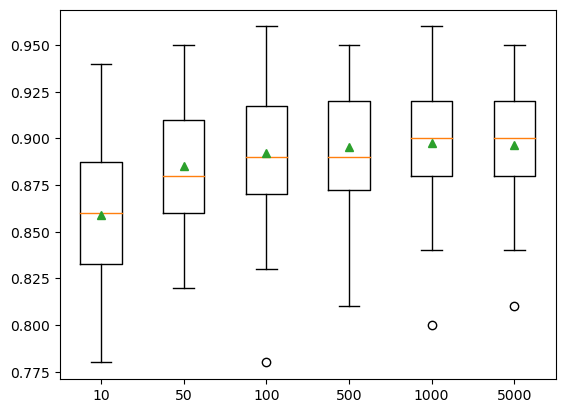

In [9]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section32"></a> 
## <font color="#004D7F"> 3.2. Número de características</font>

El número de características seleccionadas para cada subespacio aleatorio controla la diversidad del conjunto. 
- Menos características significan más diversidad, mientras que más características significan menos diversidad.
- Más diversidad puede requerir más árboles para reducir la varianza de las predicciones realizadas por el modelo.
- El número de caracterśiticas utilizadas para ajustar cada árbol de decisión se establece mediante el argumento `max_features`. 
- El siguiente ejemplo varía el valor de 1 a 20 con un número fijo de árboles en el conjunto.

In [ ]:
# obtener una lista de modelos para evaluar
def get_models():
    models = ???
    # evaluar las características de 1 a 20
    for n in ???:
        models[str(n)] = ???
    return models

In [ ]:
# definir dataset
X, y = ???
# obtener los modelos para evaluar
models = ???
# evaluar los modelos y almacenar los resultados
results, names = ???
for name, model in models.items():
    # evaluar el modelo
    scores = ???
    # almacenar los resultados
    ???
    ???
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.618 (0.049)
>2 0.780 (0.042)
>3 0.830 (0.042)
>4 0.852 (0.039)
>5 0.875 (0.032)
>6 0.883 (0.030)
>7 0.885 (0.034)
>8 0.889 (0.034)
>9 0.886 (0.033)
>10 0.893 (0.033)
>11 0.889 (0.034)
>12 0.882 (0.038)
>13 0.881 (0.039)
>14 0.878 (0.042)
>15 0.867 (0.037)
>16 0.858 (0.045)
>17 0.852 (0.040)
>18 0.833 (0.044)
>19 0.815 (0.047)
>20 0.805 (0.051)


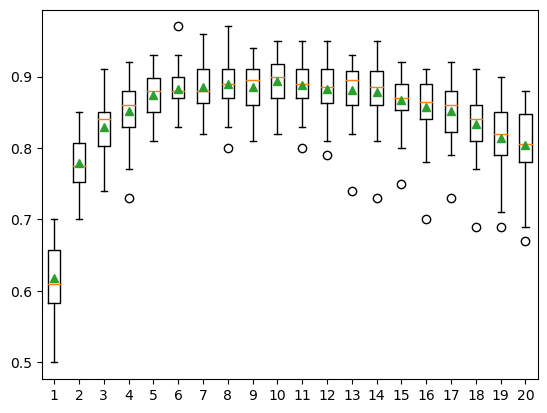

In [10]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section33"></a> 
## <font color="#004D7F"> 3.3. Algoritmo alternativo</font>

Se pueden utilizar otros algoritmos para construir Random Subspace y deben configurarse para que tengan una varianza modestamente alta. 
- Un ejemplo es el algoritmo KNN donde el valor _k_ se puede establecer en un valor bajo.
- El algoritmo utilizado en el conjunto se especifica mediante el argumento `estimator` y debe establecerse en una instancia del algoritmo y la configuración del algoritmo que se utilizará. 
- El siguiente ejemplo demuestra el uso de `KNeighborsClassifier` como algoritmo base utilizado en el conjunto Random Subspace a través de la clase `Bagging`. 
- Aquí, el algoritmo se utiliza con hiperparámetros predeterminados donde _k_ se establece en 5.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier)
</div>

In [12]:
# evaluate random subspace ensemble with knn algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

X, y = ???
# definir el modelo
model = ???
# definir el procedimiento de evaluación
cv = ???
# evaluar el modelo
n_scores = ???
print('Accuracy medio: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.899 (0.032)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="sectionEj"></a>
<h3><font color="#004D7F" size=6> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicios</font></h3>

Se proponen las siguientes actividades para consolidar el aprendizaje.

# <font color="#004D7F" size=5>Ejercicio 1</font>
__Hiperparámtros__. Explore diferentes configuraciones para la cantidad de árboles e incluso configuraciones de árbol individuales para ver si puede mejorar aún más los resultados. 

# <font color="#004D7F" size=5>Ejercicio 2</font>
__Bag de otro algoritmo__. Se pueden utilizar otros algoritmos con Random Subspace. Por ejemplo, un algoritmo diferente de _k_-nearest neighbor. Busque alguno que sea adecuado paa este tipo de problemas.

# <font color="#004D7F" size=5>Ejercicio 3</font>
__Problema de Regresión__. Random Subspace se puede utilizar con árboles de regresión. En lugar de predecir el valor de clase más común del conjunto de predicciones, puede devolver el promedio de las predicciones de los árboles bagging. Experimente con problemas de regresión.

# <font color="#004D7F" size=5>Ejercicio 4</font>
__Datasets reales__. Busque un dataset original y verdadero (que no sea sintético) y evalúe el uso de los conceptos vistos en esta unidad. Los conjuntos de datos en pueden ser obtenidos del [repositorio de aprendizaje automático de UCI](https://archive.ics.uci.edu/).

# <font color="#004D7F" size=5>Ejercicio 5</font>
__Valores de _k___. Juegue con diferentes valores de _k_ cuando se utiliza KNN en Random Subspace y analice la salida dada. Vea los ejemplos vistos en Random Subspace.

# <font color="#004D7F" size=5>Ejercicio 6</font>
__Extensiones__. En la unidad anterior vimos extensiones como Pasting y Random Patches. Evalúe si estas extensiones aplican a Random Subspace.

# <font color="#004D7F" size=5>Ejercicio 7</font>
__Búsqueda de la mejor configuración__. Como se ha visto existen diferentes hiperparámetros que pueden ajustar nuestro modelo. Haga una búsqueda para un dataset real de cuales, entre un rango amplio de hiperparétros, maximizan la métrica. Puede utilizar una búsqueda aleatoria.

---

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>